In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

class StatsChat_Zoom:
    def __init__(self, path=None):
        self.path = path
        self.records = None
        pass
    
    def read_file_record(self):
        if self.path is not None:
            with open(self.path, 'r') as file_record:
                self.records = file_record.readlines()
                print(self.records)
            return True
        return False
                
    # Convert records from raw input to records have type: time, from, to, message
    def extract_records(self):
        if self.records is not None:
            messages = {'time': [], 'contents': [], 'people': [], 'from': [], 'to': [], 'message': []}
            for record in self.records:
                data = record.split("From")
                if len(data) == 1:
                    self.records.remove(record)
                elif len(data) == 2:
                    messages['time'].append(data[0])
                    messages['contents'].append(data[1])
            # Split contents to people and message        
            for message in messages['contents']:
                d = message.split(':')
                if len(d) > 1:
                    messages['people'].append(d[0])
                    messages['message'].append(d[1])
            # Split people to: from, to       
            for i in messages['people']:
                d = i.split('To')
                if len(d) > 1:
                    messages['from'].append(d[0])
                    messages['to'].append(d[1])
                else:
                    messages['from'].append(d[0])
                    messages['to'].append('Lecturer')
            # Delete keys: contents, people       
            del messages['contents']; del messages['people']
            
            # Stanardlize values
            length = len(messages['time'])
            for i in range(length):
                messages['time'][i] = messages['time'][i].replace("\t", "").replace(" ", "").replace("\n","")
                messages['from'][i] = messages['from'][i].replace("\t", "").replace("\n","")
                messages['to'][i] = messages['to'][i].replace("\t", "").replace("\n","")
                messages['message'][i] = messages['message'][i].replace("\t", "").replace("\n", "")
            self.records = messages
        else:
            return None
                    
    # Write records to file csv
    def convert_record(self):
        if self.records is not None:
            path = self.path.replace('txt', 'csv')
            with open(path, "w") as outfile:
                writter = csv.writer(outfile)
                writter.writerow(self.records.keys())
                writter.writerows(zip(*self.records.values()))
                
    def comunicate(self, n=1, color='blue'):
        path = self.path.replace('txt', 'csv')
        records = pd.read_csv(path)
        counts = records.groupby('from').count().reset_index()
        counts = counts.sort_values('time', ascending=False).head(n).reset_index()
        #a = a.sort_values('time', ascending=False).head(20)
        #a = a.reset_index()[['from', 'time']]
        counts.plot(x='from', y='time', kind='bar', color=color)
        plt.show()
    @staticmethod
    def visualizing(path=None, color='blue', n=1):
        records = pd.read_csv(path)
        counts = records.groupby('from').count().reset_index()
        counts = counts.sort_values('time', ascending=False).head(n).reset_index()
        #a = a.sort_values('time', ascending=False).head(20)
        #a = a.reset_index()[['from', 'time']]
        counts.plot(x='from', y='time', kind='bar', color=color)
        plt.show()

In [82]:
a = StatsChat_Zoom(path='meeting_saved_chat.txt')

In [83]:
a.read_file_record()

['a From b To c : hello\n']


True

In [84]:
a.extract_records()

In [85]:
a.convert_record()

In [86]:
a.records

{'time': ['a'], 'from': [' b '], 'to': [' c '], 'message': [' hello']}

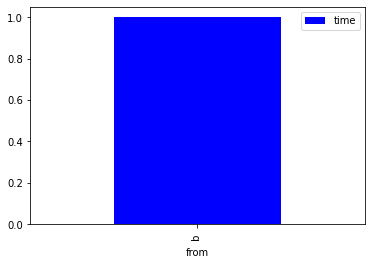

In [87]:
a.comunicate()

In [80]:
StatsChat_Zoom().visualizing('meeting.csv', color='red')

NameError: name 'n' is not defined